<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/stochastic_GD_vs_Batch_GD_vs_Minibatch_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
data = pd.read_csv('homeprices_banglore.csv')
data

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [ ]:
scale = preprocessing.MinMaxScaler()

In [ ]:
X_scaled = scale.fit_transform(data[['area','bedrooms']])
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
area = X_scaled[:,0]
bedr = X_scaled[:,1]

In [ ]:
y_scaled = scale.fit_transform(data[['price']])
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
p = y_scaled.flatten()
p.shape

(20,)

In [ ]:
b=0

In [ ]:
print(p.shape)
print(area.shape)
print(bedr.shape)
print((p - area * w[0] - bedr *w[1]).shape)
print((-area*(p - area * w[0] - bedr *w[1] - b)).shape)
print((-(p - area*w[0] - bedr*w[1] - b)).shape)

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)


# Batch Gradient Descent

In [ ]:
epochs = 300

def batch_GD(X, y, lr = 0.01):

  cost = []

  p = y_scaled.flatten()
  area = X_scaled[:,0]
  bedr = X_scaled[:,1]
  w = np.ones(X_scaled.shape[1])
  b = 0
  total_samples =  X_scaled.shape[0]

  for i in range(epochs):

     dl_dw = np.sum(np.array([-area*(p - area * w[0] - bedr * w[1] - b),
                       -bedr*(p - area * w[0] - bedr * w[1] - b)]),axis=1)
     dl_db = np.sum(-(p - area * w[0] - bedr * w[1] - b))
    #  print(dl_dw)
    #  print(dl_db)
     
     w = w - lr * dl_dw
     b = b - lr * dl_db

     p_hat = area * w[0] + bedr * w[1] + b

     cost.append(np.mean(np.square(p - p_hat)))

  return w,b,cost,p_hat



In [ ]:
w, b, cost, p_hat= batch_GD(X_scaled,y_scaled)

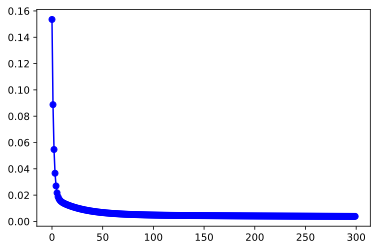

In [ ]:
plt.plot(range(epochs), cost, 'bo-')

In [ ]:
y_pred = scale.inverse_transform(p_hat.reshape(-1,1))

In [ ]:
cost[-1]

0.003842452525478294

In [ ]:
np.hstack([np.array(data[['price']]),y_pred])

array([[ 39.07      ,  39.0288382 ],
       [120.        , 122.26876871],
       [ 62.        ,  67.99171066],
       [ 75.        ,  70.63404189],
       [ 51.        ,  43.72631593],
       [ 38.        ,  42.74767474],
       [135.        , 126.57478997],
       [155.        , 145.10372993],
       [ 50.        ,  63.75093215],
       [167.        , 174.58854437],
       [ 82.        ,  79.735405  ],
       [140.        , 128.30372275],
       [ 38.        ,  37.2020413 ],
       [ 40.        ,  40.46417862],
       [101.        ,  94.41502293],
       [ 42.        ,  42.9107816 ],
       [ 48.        ,  59.51015364],
       [ 60.        ,  71.25384798],
       [102.        , 111.37813698],
       [ 32.        ,  14.2415015 ]])

# Stochastic Gradient Descent


In [234]:
p

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [233]:
p[0]

0.0523703703703704

In [232]:
p[5]

0.04444444444444445

In [258]:
X_scaled.shape[1]

2

In [275]:
np.ones(X_scaled.shape[1]).shape

(2,)

In [279]:
np.array([3,4]).shape

(2,)

In [284]:
epochs = 300

def Stochastic_GD(X, y, lr = 0.01):

  cost = []

  p = y_scaled.flatten()

  w = np.ones(X_scaled.shape[1])
  b = 0
  total_samples =  X_scaled.shape[0]

  for i in range(epochs):

    rand = np.random.choice(20,1)
    area = X_scaled[rand,0]
    bedr = X_scaled[rand,1]
    p_rand = p[rand]

    dl_dw = np.array([-area*(p_rand - area * w[0] - bedr * w[1] - b),
                       -bedr*(p_rand - area * w[0] - bedr * w[1] - b)]).flatten()
    dl_db = -(p_rand - area * w[0] - bedr * w[1] - b)
    # print(dl_dw.shape)
    # print(dl_db.shape)
     
    w = w - lr * dl_dw
    b = b - lr * dl_db
    # print(w)
    # print(b.shape)

    p_hat = area * w[0] + bedr * w[1] + b
    # print(area)
    # print(w[0])
    # print(p_rand)
    cost.append(np.square(p_rand - p_hat))
    # print('*******************')
  return w,b,cost,p_hat


In [285]:
w, b, cost, p_hat= Stochastic_GD(X_scaled,y_scaled)

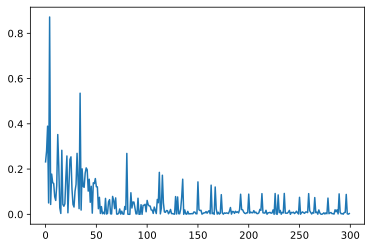

In [286]:
plt.plot(range(epochs), cost)

In [287]:
y_pred = scale.inverse_transform(p_hat.reshape(-1,1))

In [288]:
cost[-1]

array([0.00334687])

#mini_batch gradient descent

In [ ]:
epochs = 300

def Minibatch_GD(X, y, lr = 0.01, batchsize=4):

  cost = []

  p = y_scaled.flatten()
  area = X_scaled[:,0]
  bedr = X_scaled[:,1]
  w = np.ones(X_scaled.shape[1])
  b = 0






  return w,b,cost,p_hat

